In [16]:
import nbsetup as nb
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import ensemblepy as ep
import matplotlib.pyplot as plt


In [2]:
lasts = pickle.load(open('../../datasets/daisy_scan200.pickle', 'rb'))

In [14]:
def maxi(arr, threshold):
    arr[arr > threshold] = threshold
    return arr

In [11]:
CUT = 20
divs = np.array([ep.radial_divergences(l.histograms[:CUT], discrete=True, normalise=True) for l in lasts.values()])

# Threshold is invariant

In [21]:
K = (10,50,100,200,300,400)
dens = {}
for k in K:
    dens[k] = np.array([ep.densities(d, k=k)[0] for d in divs])

In [67]:
T = np.linspace(0.001,0.5,6)

data = []
for i, k in enumerate(K):
    for t in T:
        for x, d in enumerate(dens[k]):
            data.append({
                't': t,
                'x': x,
                'k': k,
                'y': (maxi(d, t).mean()-maxi(dens[k][0], t).mean())
            })
data = pd.DataFrame(data)

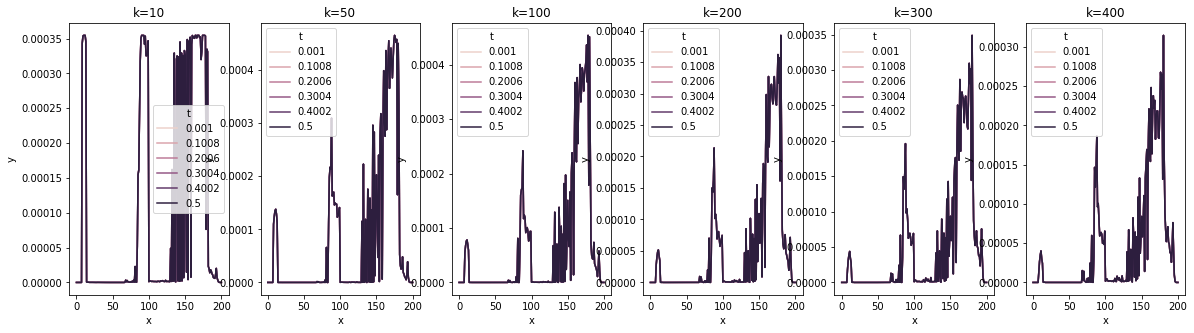

In [68]:
fig, axes = plt.subplots(1, len(K), figsize=(20,5))
for i, k in enumerate(K):
    sns.lineplot(data=data[data.k == k], x='x', y='y', hue='t', ax=axes[i]).set(title="k=%s" % k)

# K levels off

<AxesSubplot:xlabel='x', ylabel='y'>

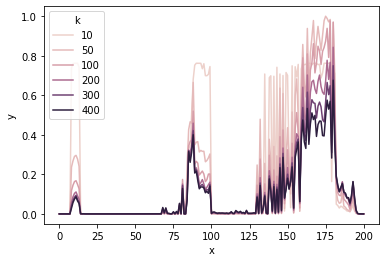

In [70]:
df = data[data.t==T[3]]
sns.lineplot(x=df.x, y=df.y/df.y.max(), hue=df.k)